https://radimrehurek.com/gensim/models/word2vec.html

In [32]:
!pip install gensim==3.8

You should consider upgrading via the '/Users/luansilva/furb_deeplearning/.direnv/python-3.9.1/bin/python -m pip install --upgrade pip' command.


In [33]:
gensim.__version__

'3.8.0'

In [34]:
from gensim.models import Word2Vec
import gensim

In [35]:
# dados
data =  """Neste sentido, o fenômeno da participação social nos obriga à análise do sistema de participação geral. Podemos já vislumbrar o modo pelo qual a constante divulgação das informações garante a contribuição de um grupo importante na determinação das diretrizes de desenvolvimento para o futuro. Assim mesmo, a contínua implementação de obras causa impacto indireto na reavaliação dos índices pretendidos. Gostaria de enfatizar que o aumento do diálogo entre os diferentes setores produtivos pode nos levar a considerar a reestruturação das posturas dos órgãos dirigentes com relação às suas atribuições. Do mesmo modo, a determinação clara de objetivos ainda não demonstrou convincentemente que vai participar na mudança do levantamento das variáveis envolvidas.

          Todas estas questões, devidamente ponderadas, levantam dúvidas sobre se o desenvolvimento contínuo de distintas formas de atuação obstaculiza a apreciação da importância das novas proposições. Desta maneira, a consolidação das políticas públicas facilita a criação dos paradigmas socioculturais. As minhas experiências acumuladas no meio político demonstram que a crescente influência da mídia agrega valor ao estabelecimento das formas de ação. Por outro lado, a consulta aos diversos militantes talvez venha a ressaltar a relatividade do processo de comunicação como um todo.

          A nível sociocultural, a revolução dos costumes acarreta um processo de reformulação e modernização do remanejamento dos recursos necessários. O empenho em analisar a execução das metas do meu mandato auxilia a preparação e a composição de alternativas às soluções ortodoxas. Evidentemente, o desafiador cenário político atual representa uma abertura para a melhoria dos métodos utilizados na avaliação de resultados.

          Pensando mais a longo prazo, a segurança, educação e saúde é uma das consequências do retorno esperado a longo prazo. No entanto, não podemos esquecer que a hegemonia do ambiente político oferece uma interessante oportunidade para verificação de todos os recursos públicos envolvidos. O que temos que ter sempre em mente é que a expansão das metas para meu mandato cumpre um papel essencial na formulação dos modos de operação convencionais. No governo atual, a mobilidade urbana exige a precisão e a definição dos níveis de motivação da sociedade.

          Todavia, o acompanhamento das vontades do povo desafia a capacidade de equalização da gestão inovadora da qual fazemos parte. É claro que a necessidade de renovação no cenário político aponta para a melhoria dos procedimentos normalmente adotados. A minha prática na política prova que o julgamento imparcial das eventualidades estimula a padronização do investimento em saúde, educação e segurança.""".split('\n')

In [36]:
preproc_data = [gensim.utils.simple_preprocess(row) for row in data]

In [44]:
embedding_dim = 100
window_size = 10
min_count = 1

In [45]:
model = Word2Vec(sentences=preproc_data, size=embedding_dim, window=window_size, min_count=min_count, workers=4)
word_vectors = model.wv

In [47]:
word_vectors.most_similar('longo')

[('dos', 0.27421462535858154),
 ('indireto', 0.2621443569660187),
 ('desafia', 0.22752603888511658),
 ('contribuição', 0.22619333863258362),
 ('adotados', 0.21628530323505402),
 ('ortodoxas', 0.20264455676078796),
 ('estas', 0.1974387764930725),
 ('divulgação', 0.19082343578338623),
 ('na', 0.18361255526542664),
 ('influência', 0.17288139462471008)]

In [53]:
word_vectors.most_similar(positive=['social', 'análise'], negative=['sistema'], topn=1)

[('atual', 0.22033175826072693)]

In [49]:
from sklearn.manifold import TSNE
import re
import matplotlib.pyplot as plt

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

<ipython-input-49-43fc8ac6dc87>:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


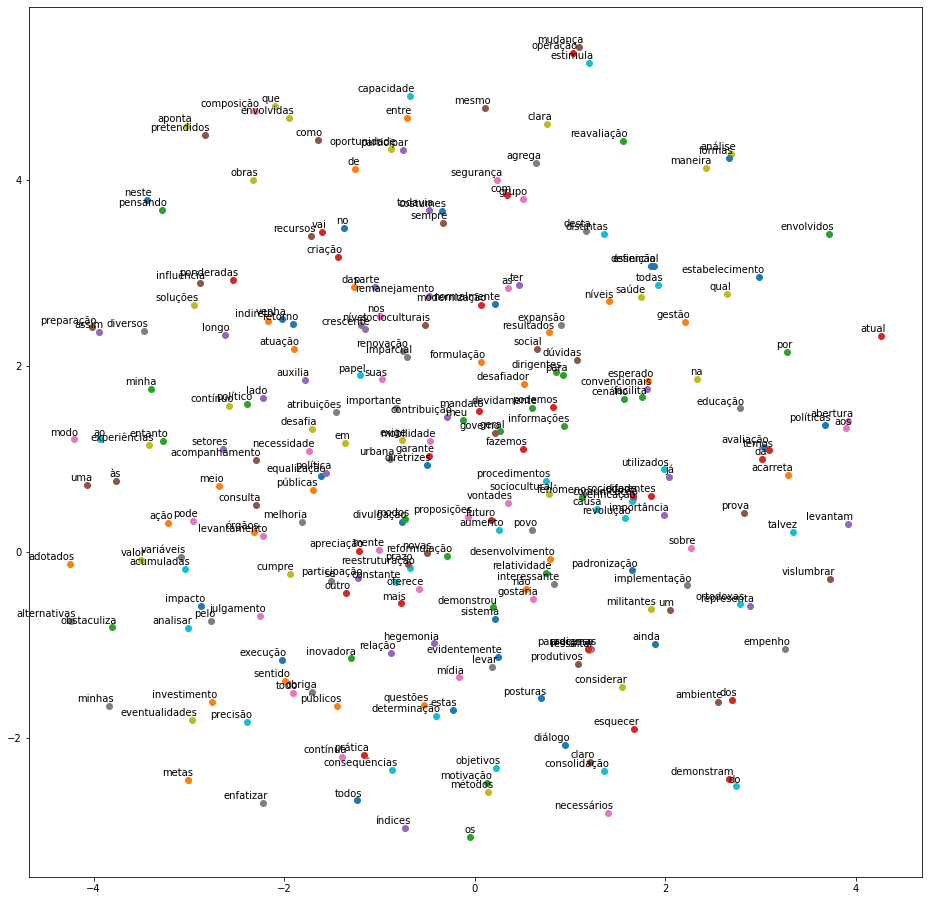

In [50]:
tsne_plot(model)